<div style="text-align: right">INFO 6105 Data Sci Engineering Methods and Tools, Assignment 4</div>
<div style="text-align: right">Zixiao Wang, 27 September 2019</div>

# Assignment 4



## Requirements

1. Find a time-series dataset and predict future values using random forest regression. See how far into the future you can predict (with at least 75% accuracy on a test dataset).
2. Find a dataset and model it by guessing a pdf that matches its histogram. Then find the mist likely parameters of pdf using MLE.

Indicate the source of your dataset. Do not share your dataset with other team.

## 1. Find a time-series dataset and predict future values using random forest regression

### Goal

I will use FR to predict the ```PM2.5``` in Beijing from history recording in  ```PM2.5, DEWP,TEMP,PRES,Iws,Is,Ir```

I will firstly implement the RF which can predict next hour pm2.5

Then I will plot the accuracy of the model for every extra hour of prediction

### Data set information

[UCI Beijing PM2.5](https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data)

#### Source:

Song Xi Chen, csx '@' gsm.pku.edu.cn, Guanghua School of Management, Center for Statistical Science, Peking University.

#### Data Set Information:

The data's time period is between Jan 1st, 2010 to Dec 31st, 2014. Missing data are denoted as NA.

#### Attribute Information:

```none
No: row number
year: year of data in this row
month: month of data in this row
day: day of data in this row
hour: hour of data in this row
pm2.5: PM2.5 concentration (ug/m^3)
DEWP: Dew Point (â„ƒ)
TEMP: Temperature (â„ƒ)
PRES: Pressure (hPa)
cbwd: Combined wind direction
Iws: Cumulated wind speed (m/s)
Is: Cumulated hours of snow
Ir: Cumulated hours of rain
```

#### Relevant Papers:

Liang, X., Zou, T., Guo, B., Li, S., Zhang, H., Zhang, S., Huang, H. and Chen, S. X. (2015). Assessing Beijing's PM2.5 pollution: severity, weather impact, APEC and winter heating. Proceedings of the Royal Society A, 471, 20150257.


#### Citation Request:

Liang, X., Zou, T., Guo, B., Li, S., Zhang, H., Zhang, S., Huang, H. and Chen, S. X. (2015). Assessing Beijing's PM2.5 pollution: severity, weather impact, APEC and winter heating. Proceedings of the Royal Society A, 471, 20150257.

## 1.1 Implement the RF which can predict next hour pm2.5

### 1.1.1 Import the data from csv

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('dataset/BeijingPM2.5DataDataSet2010.1.1-2014.12.31.csv')

In [3]:
print("----First 10 recordings")
df.head(10)

----First 10 recordings


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
5,6,2010,1,1,5,NaN,-19,-10.0,1017.0,NW,16.10,0,0
6,7,2010,1,1,6,NaN,-19,-9.0,1017.0,NW,19.23,0,0
7,8,2010,1,1,7,NaN,-19,-9.0,1017.0,NW,21.02,0,0
8,9,2010,1,1,8,NaN,-19,-9.0,1017.0,NW,24.15,0,0
9,10,2010,1,1,9,NaN,-20,-8.0,1017.0,NW,27.28,0,0


In [4]:
print("----Final 10 recordings")
df.tail(10)

----Final 10 recordings


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
43814,43815,2014,12,31,14,9.0,-27,1.0,1032.0,NW,196.21,0,0
43815,43816,2014,12,31,15,11.0,-26,1.0,1032.0,NW,205.15,0,0
43816,43817,2014,12,31,16,8.0,-23,0.0,1032.0,NW,214.09,0,0
43817,43818,2014,12,31,17,9.0,-22,-1.0,1033.0,NW,221.24,0,0
43818,43819,2014,12,31,18,10.0,-22,-2.0,1033.0,NW,226.16,0,0
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0
43823,43824,2014,12,31,23,12.0,-21,-3.0,1034.0,NW,249.85,0,0


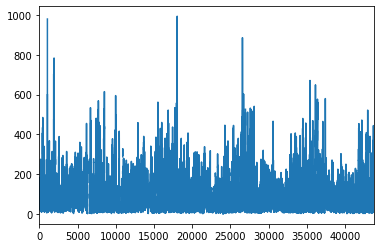

In [5]:
df['pm2.5'].plot()

### 1.1.2 Cleaning dataset

First check the data in dataset

In [6]:
print('----------head---------')
print(df.head(5))
print('------information------')
print(df.info())
print('-----missing value-----')
print(df.isnull().sum())
print('--------nan value------')
print(df.isna().sum())

----------head---------
   No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir
0   1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1.79   0   0
1   2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   4.92   0   0
2   3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   6.71   0   0
3   4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   9.84   0   0
4   5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW  12.97   0   0
------information------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
No       43824 non-null int64
year     43824 non-null int64
month    43824 non-null int64
day      43824 non-null int64
hour     43824 non-null int64
pm2.5    41757 non-null float64
DEWP     43824 non-null int64
TEMP     43824 non-null float64
PRES     43824 non-null float64
cbwd     43824 non-null object
Iws      43824 non-null float64
Is       43824 non-null int64
Ir       438

Fill the data that are missing

In [7]:
df = df.fillna(method = 'backfill', axis = 0)
print('-----missing value-----')
print(df.isnull().sum())
print('--------nan value------')
print(df.isna().sum())
df.head(10)

-----missing value-----
No       0
year     0
month    0
day      0
hour     0
pm2.5    0
DEWP     0
TEMP     0
PRES     0
cbwd     0
Iws      0
Is       0
Ir       0
dtype: int64
--------nan value------
No       0
year     0
month    0
day      0
hour     0
pm2.5    0
DEWP     0
TEMP     0
PRES     0
cbwd     0
Iws      0
Is       0
Ir       0
dtype: int64


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,129.0,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,129.0,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,129.0,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,129.0,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,129.0,-20,-12.0,1018.0,NW,12.97,0,0
5,6,2010,1,1,5,129.0,-19,-10.0,1017.0,NW,16.10,0,0
6,7,2010,1,1,6,129.0,-19,-9.0,1017.0,NW,19.23,0,0
7,8,2010,1,1,7,129.0,-19,-9.0,1017.0,NW,21.02,0,0
8,9,2010,1,1,8,129.0,-19,-9.0,1017.0,NW,24.15,0,0
9,10,2010,1,1,9,129.0,-20,-8.0,1017.0,NW,27.28,0,0


### 1.1.3 Simplify the attributes

I only want to use below attributes to train module:

```
month: month of data in this row
day: day of data in this row
hour: hour of data in this row
pm2.5: PM2.5 concentration (ug/m^3)
DEWP: Dew Point (â„ƒ)
TEMP: Temperature (â„ƒ)
PRES: Pressure (hPa)
Iws: Cumulated wind speed (m/s)
Is: Cumulated hours of snow
Ir: Cumulated hours of rain
```

In [8]:
cols = list(df.columns)
df_less = df[cols[2:9]+cols[10:11]]
df_less.head(10)

,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws
0,1,1,0,129.0,-21,-11.0,1021.0,1.79
1,1,1,1,129.0,-21,-12.0,1020.0,4.92
2,1,1,2,129.0,-21,-11.0,1019.0,6.71
3,1,1,3,129.0,-21,-14.0,1019.0,9.84
4,1,1,4,129.0,-20,-12.0,1018.0,12.97
5,1,1,5,129.0,-19,-10.0,1017.0,16.10
6,1,1,6,129.0,-19,-9.0,1017.0,19.23
7,1,1,7,129.0,-19,-9.0,1017.0,21.02
8,1,1,8,129.0,-19,-9.0,1017.0,24.15
9,1,1,9,129.0,-20,-8.0,1017.0,27.28


### 1.1.4 Rank the pm2.5

So I classify pm2.5 data

Each group indecates one kind of weather condition

```
rank_1 = 1	
0~35μg/m³

rank_2 = 2	
35~75μg/m³

rank_3 = 3
75~115μg/m³

rank_4 = 4
115~150μg/m³

rank_5 = 5
150~250μg/m³

rank_6 = 6
> 250μg/m³
```


In [9]:
def divide_pm2_5(x):
    if x> 250:
        return 6
    elif x>150 and x<= 250:
        return 5
    elif x>115 and x<=150:
        return 4
    elif x > 75 and x <=115:
        return 3
    elif x>35 and x <=75:
        return 2
    elif x>0 and x<=35:
        return 1
    return 7
df_less['pm2.5'] = df_less['pm2.5'].apply(divide_pm2_5)
df_less.head(10)

D:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws
0,1,1,0,4,-21,-11.0,1021.0,1.79
1,1,1,1,4,-21,-12.0,1020.0,4.92
2,1,1,2,4,-21,-11.0,1019.0,6.71
3,1,1,3,4,-21,-14.0,1019.0,9.84
4,1,1,4,4,-20,-12.0,1018.0,12.97
5,1,1,5,4,-19,-10.0,1017.0,16.10
6,1,1,6,4,-19,-9.0,1017.0,19.23
7,1,1,7,4,-19,-9.0,1017.0,21.02
8,1,1,8,4,-19,-9.0,1017.0,24.15
9,1,1,9,4,-20,-8.0,1017.0,27.28


### 1.1.5 Train the module that can predict next day's pm2.5

Shift the data to next day

In [10]:
 # Shift pm2.5 down to predict next day
series1=df_less['pm2.5'].shift(-1)
df_less.insert(0,'pm2.5_next',series1)

In [11]:
df_less=df_less.dropna(axis=0)

In [12]:
df_less.tail(10)

,pm2.5_next,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws
43813,1.0,12,31,13,1,-27,0.0,1032.0,186.38
43814,1.0,12,31,14,1,-27,1.0,1032.0,196.21
43815,1.0,12,31,15,1,-26,1.0,1032.0,205.15
43816,1.0,12,31,16,1,-23,0.0,1032.0,214.09
43817,1.0,12,31,17,1,-22,-1.0,1033.0,221.24
43818,1.0,12,31,18,1,-22,-2.0,1033.0,226.16
43819,1.0,12,31,19,1,-23,-2.0,1034.0,231.97
43820,1.0,12,31,20,1,-22,-3.0,1034.0,237.78
43821,1.0,12,31,21,1,-22,-3.0,1034.0,242.70
43822,1.0,12,31,22,1,-22,-4.0,1034.0,246.72


Extract the X and y

In [13]:
cols = list(df_less.columns) 
X = df_less[cols[1:]]
y = df_less[cols[0]]


In [14]:
y.head(10)

0    4.0
1    4.0
2    4.0
3    4.0
4    4.0
5    4.0
6    4.0
7    4.0
8    4.0
9    4.0
Name: pm2.5_next, dtype: float64

In [15]:
X.head(10)

,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws
0,1,1,0,4,-21,-11.0,1021.0,1.79
1,1,1,1,4,-21,-12.0,1020.0,4.92
2,1,1,2,4,-21,-11.0,1019.0,6.71
3,1,1,3,4,-21,-14.0,1019.0,9.84
4,1,1,4,4,-20,-12.0,1018.0,12.97
5,1,1,5,4,-19,-10.0,1017.0,16.10
6,1,1,6,4,-19,-9.0,1017.0,19.23
7,1,1,7,4,-19,-9.0,1017.0,21.02
8,1,1,8,4,-19,-9.0,1017.0,24.15
9,1,1,9,4,-20,-8.0,1017.0,27.28


Make train and test dataset

In [16]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(X.values, y.values, test_size = 0.25,
                                                                           random_state = 42)

Use RF to predict the pm2.5

In [18]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [19]:
%%time
# Instantiate model 
rf = RandomForestRegressor(n_estimators=100, random_state=0, n_jobs=-1)

# Train the model on training data
rf.fit(train_features, train_labels)
# (len(train_features), len(train_labels))

Wall time: 1.65 s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

Fitness of module and calculate the error

Let's score the model at how good it is if I only want to predict pm2.5 in one hour

In [20]:
rf.score(test_features, test_labels)

0.8943759476734829

## 1.2 Plot how far the module can predict

Predict the pm2.5 in next day,next next day and so on

Let's see the plot

It will take about 17s to train if the time = 40

D:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


Wall time: 14.6 s


Text(0.5, 0, 'How far the module predict (unit:hour)')

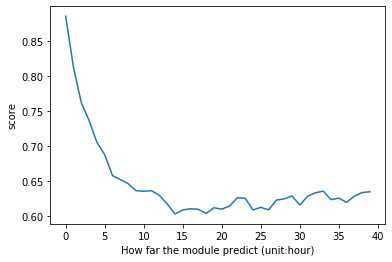

In [23]:
%%time
# How far you want to plot the module score
# The time unit in hour
# time = 100 means train module to predict the pm2.5 after 1~100 hour, and plot each module score
time = 40


# simply the attributes
cols = list(df.columns)
df_less = df[cols[2:9]+cols[10:11]]
df_less

# divide pm2.5
df_less['pm2.5'] = df_less['pm2.5'].apply(divide_pm2_5)
df_less.head(10)

# shift the column
series1=df_less['pm2.5'].shift(-1)
df_less.insert(0,'pm2.5_next',series1)

time_series = range(time)
score = []
for i in time_series:
    
    # data cleaning
    df_less = df_less.dropna(axis=0)

    # train module and return the score of the module
    cols = list(df_less.columns) 
    X = df_less[cols[1:]]
    y = df_less[cols[0]]

    # Split the data into training and testing sets
    train_features, test_features, train_labels, test_labels = train_test_split(X.values, y.values, test_size = 0.25,
                                                                           random_state = 42)
    # Instantiate model 
    rf = RandomForestRegressor(n_estimators=10, random_state=0, n_jobs=-1)

    # Train the model on training data
    rf.fit(train_features, train_labels)
    score.append(rf.score(test_features, test_labels))

    # shift the data
    # Shift pm2.5 down to predict next day
    series1=df_less.pop('pm2.5_next').shift(-1)
    df_less.insert(0,'pm2.5_next',series1)
    
plt.plot(time_series,score)
plt.ylabel("score")
plt.xlabel("How far the module predict (unit:hour)")

As can be seen from the figure above, I can predict the data after three hours, and the accuracy is above 75%.

---
## 2.  Find the most likely parameters of pdf using MLE

Find a dataset and model it by guessing a pdf that matches its histogram. Then find the most likely parameters of pdf using MLE.

I will use pm2.5 above to find the most likely parameters of pdf by using MLE

### 2.1 Guess pm2.5 pdf

First plot the hist of pm2.5

Text(0, 0.5, 'Pr(y)')

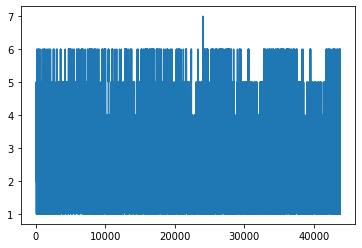

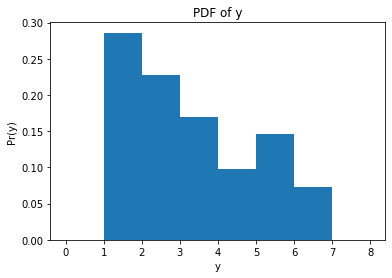

In [102]:
pm2_5 = df_less['pm2.5']

y = list(pm2_5)

plt.figure(0)
plt.plot(y)

plt.figure(1)
plt.title("PDF of y")
plt.hist(y,bins=np.arange(9),density=True)
plt.xlabel('y'); plt.ylabel('Pr(y)')

### 2.2  Find the most likely parameters of pdf using MLE.

Base above plot, I guess the pm2.5 pdf as  Poisson distribution

Calculate likelihood of all y and find best λ of Poisson distribution

$$l = \prod_{i=1}^n Pr(y_i \;| \;\lambda)$$ 

$$L(y|\lambda) = \frac{e^{-\lambda} \lambda^y}{y!}$$

In [36]:
poisson_like = lambda x, lam: np.exp(-lam) * (lam**x) / (np.arange(x)+1).prod()

D:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  """Entry point for launching an IPython kernel.


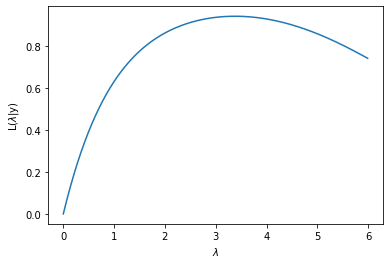

In [104]:
likelihood = [np.sum(poisson_like(yi, lam) for yi in set(y)) for lam in np.arange(0,6,0.01)]

lambdas = np.arange(0,6,0.01)
plt.plot(lambdas,likelihood)
plt.xlabel('$\lambda$')
plt.ylabel('L($\lambda$|y)')
fit_lambda = likelihood.index(np.max(likelihood)) * 0.01

The best λ is about 3.38

### 2.3 Plot PDF of y and guess graph to see the fitness

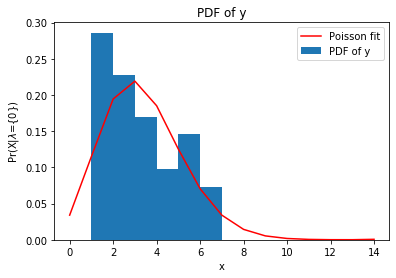

In [105]:
lam = fit_lambda
xvals = np.arange(15)

plt.title("PDF of y")
plt.hist(y,bins=np.arange(9),density=True,label='PDF of y')
plt.xlabel('y'); plt.ylabel('Pr(y)')

plt.plot(xvals, [poisson_like(x, lam) for x in xvals],'r',label='Poisson fit')
plt.xlabel('x')
plt.ylabel('Pr(X|$\lambda$={0})')

plt.legend()